<a href="https://colab.research.google.com/github/DIEGOCUM/SeminarioProfesional-Labs-16001350/blob/master/Lab1_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports data and print image array[0] 

In [37]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['Man', 'Woman','Man', 'Woman','Man', 'Woman','Man', 'Woman','Woman', 'Woman']
class_names2 = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape



(60000, 28, 28)

# Imprimos una imagen para prueba


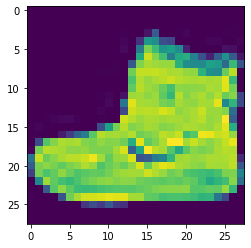

In [38]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

# El set de datos debe ser pre-procesada antes de entrenar la red

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Desplegamos la data para verificar que este en el formato que necesitamos


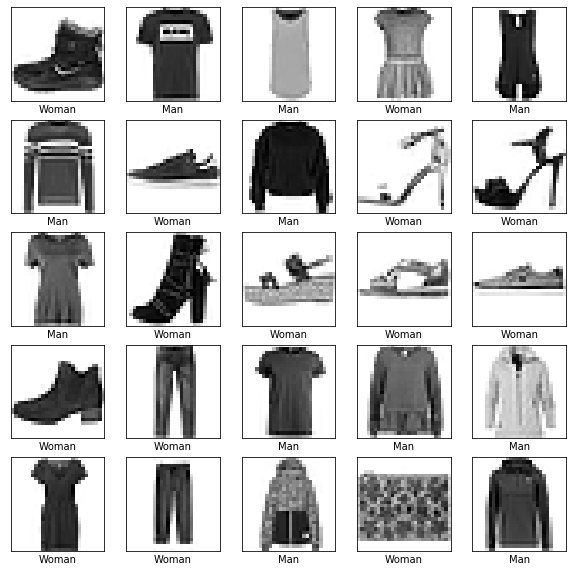

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construimos el modelo 


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

##Compile model


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo


In [58]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5031 - accuracy: 0.8193
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3642 - accuracy: 0.8663
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3299 - accuracy: 0.8790
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3057 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2861 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2735 - accuracy: 0.8984
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2586 - accuracy: 0.9029
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2466 - accuracy: 0.9068
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2387 - accuracy: 0.9088
Epoch 10/10
60

In [59]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3370 - accuracy: 0.8835

Test accuracy: 0.8835


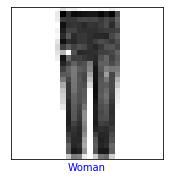

In [64]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}".format(class_names[predicted_label],),
                                color=color)

predictions = model.predict(test_images)  

i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()